In [6]:
library('ggplot2')
library(tidyverse)
library('RColorBrewer')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Apoptosis

In [7]:
df <- read.table('apoptosis/apoptosis_d5_combination_bar.txt', header = TRUE, sep = '\t')

df$dec <- factor(df$dec, levels = c('dmso', 'dec_50', 'dec_100', 'dec_200'))

head(df)

,dec,rg,rep_1,rep_2,rep_3,mean,sd
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,dmso,no,3.30,3.14,2.71,3.05,0.31
2,dec_50,no,10.18,11.11,9.36,10.22,0.88
3,dec_100,no,16.90,19.03,16.62,17.52,1.32
4,dec_200,no,27.74,28.33,26.83,27.64,0.76
5,dmso,yes,9.86,9.61,9.82,9.76,0.13
6,dec_50,yes,35.75,36.70,36.51,36.32,0.50


### DAC only

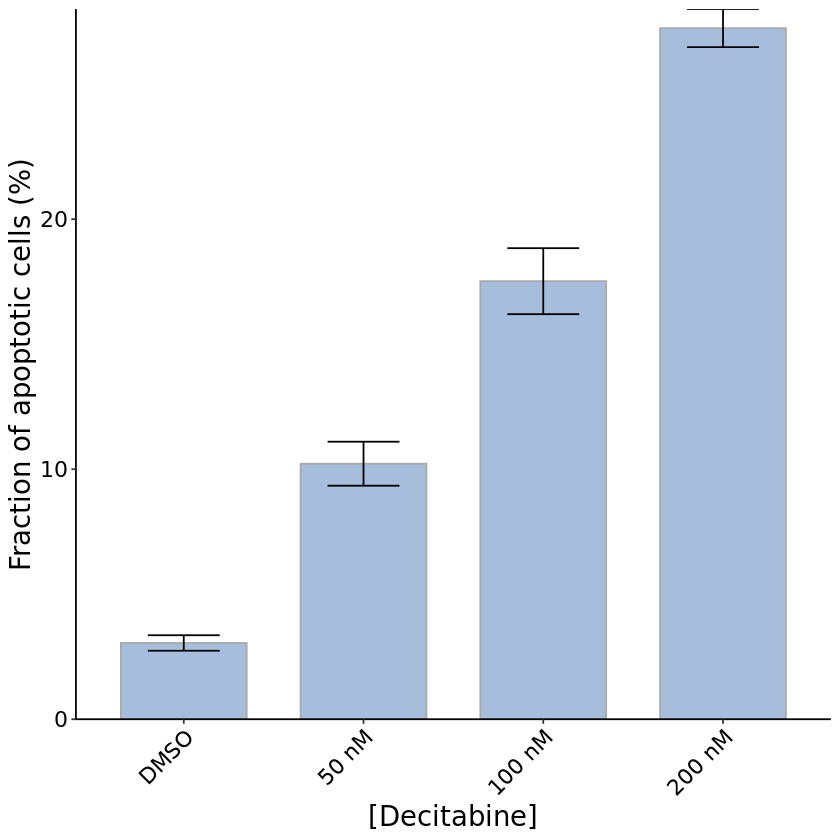

In [21]:
p <- df %>% 
    dplyr::filter(rg == 'no') %>% select(-rg) %>% 
    ggplot(aes(x = dec, y = mean)) +
    geom_bar(fill=brewer.pal(6, 'PuBuGn')[3],# aes(color = rg, fill = rg),
             stat = 'identity', position = position_dodge(0.75), width = 0.7, color = 'darkgrey') +
    theme_classic() +
    theme(axis.text.x = element_text(size = rel(1.5), color = 'black', angle = 45, hjust = 1),
          axis.text.y = element_text(size = rel(1.5), color = 'black'),
          axis.title.x = element_text(size = rel(1.5)),
          axis.title.y = element_text(size = rel(1.5)),
          legend.title = element_blank(),
          legend.text = element_text(size = rel(1.2), color = 'black'),
          legend.position = 'top'
          ) +
    labs(x = '[Decitabine]', y = 'Fraction of apoptotic cells (%)') +
    scale_x_discrete(labels = c('DMSO', '50 nM', '100 nM', '200 nM')) +
    scale_y_continuous(expand = c(0,0)) +
    geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd, width = 0.4), #, group = rg
                  position = position_dodge(0.75)) +
    scale_color_manual(values = brewer.pal(6, 'PuBuGn')[c(3,5)], labels = c('+Vehicle', '+RG3039')) +
    scale_fill_manual(values = brewer.pal(6, 'PuBuGn')[c(3,5)], labels = c('+Vehicle', '+RG3039'))

p

ggsave('apoptosis/apoptosis_bar_DAC.pdf', width = 5, height = 5)

### combination

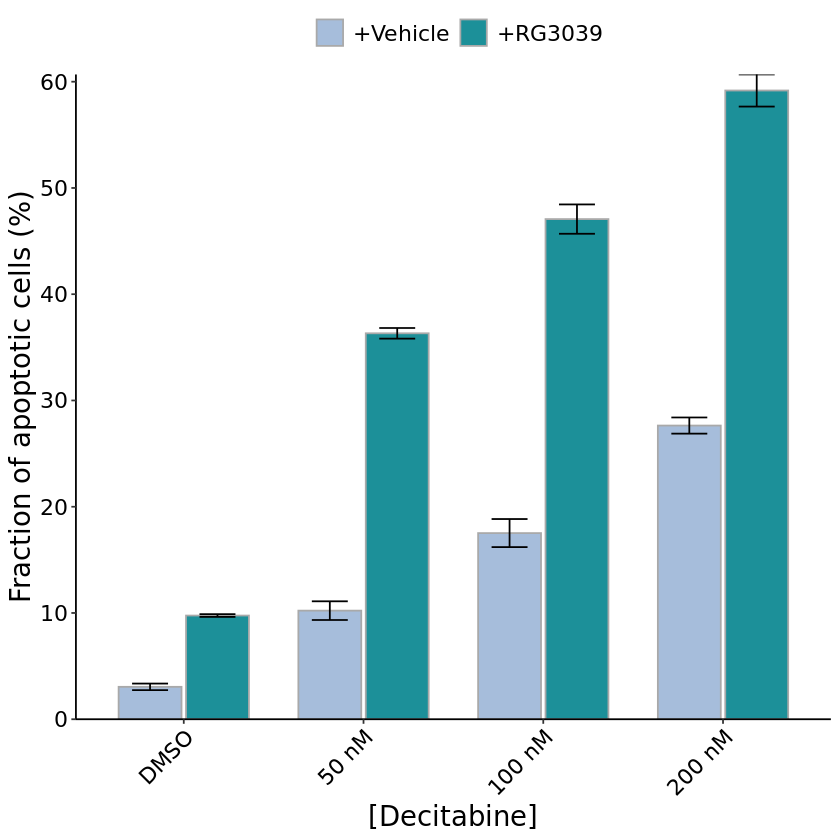

In [3]:
p <- ggplot(df, aes(x = dec, y = mean)) +
geom_bar(aes(color = rg, fill = rg), 
         stat = 'identity', position = position_dodge(0.75), width = 0.7, color = 'darkgrey') +
theme_classic() +
theme(axis.text.x = element_text(size = rel(1.5), color = 'black', angle = 45, hjust = 1),
      axis.text.y = element_text(size = rel(1.5), color = 'black'),
      axis.title.x = element_text(size = rel(1.5)),
      axis.title.y = element_text(size = rel(1.5)),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.2), color = 'black'),
      legend.position = 'top'
      ) +
labs(x = '[Decitabine]', y = 'Fraction of apoptotic cells (%)') +
scale_x_discrete(labels = c('DMSO', '50 nM', '100 nM', '200 nM')) +
scale_y_continuous(expand = c(0,0)) +
geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd, group = rg, width = 0.4), 
              position = position_dodge(0.75)) +
scale_color_manual(values = brewer.pal(6, 'PuBuGn')[c(3,5)], labels = c('+Vehicle', '+RG3039')) +
scale_fill_manual(values = brewer.pal(6, 'PuBuGn')[c(3,5)], labels = c('+Vehicle', '+RG3039'))

p

ggsave('apoptosis/apoptosis_bar_v2.pdf', width = 5, height = 5)

## Cell cycle

In [14]:
df2 <- read.table('cell_cycle/fxcycle_d5_bar.txt', header = TRUE, sep = '\t')

df2$sample <- factor(df2$sample, levels = c('dmso', 'dac_50', 'dac_100', 'dac_200', 
                                            'dmso_rg', 'dac_50_rg', 'dac_100_rg', 'dac_200_rg'))

df2$phase <- factor(df2$phase, levels = c('g2', 's', 'g1', 'sub_g1'))

head(df2)

,sample,mean,sd,phase,cumulative_mean
,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1,dmso,0.90,0.08,sub_g1,0.90
2,dmso,57.53,1.14,g1,58.43
3,dmso,24.72,0.44,s,83.15
4,dmso,16.85,1.14,g2,100.00
5,dac_50,3.43,0.18,sub_g1,3.43
6,dac_50,58.26,0.93,g1,61.69


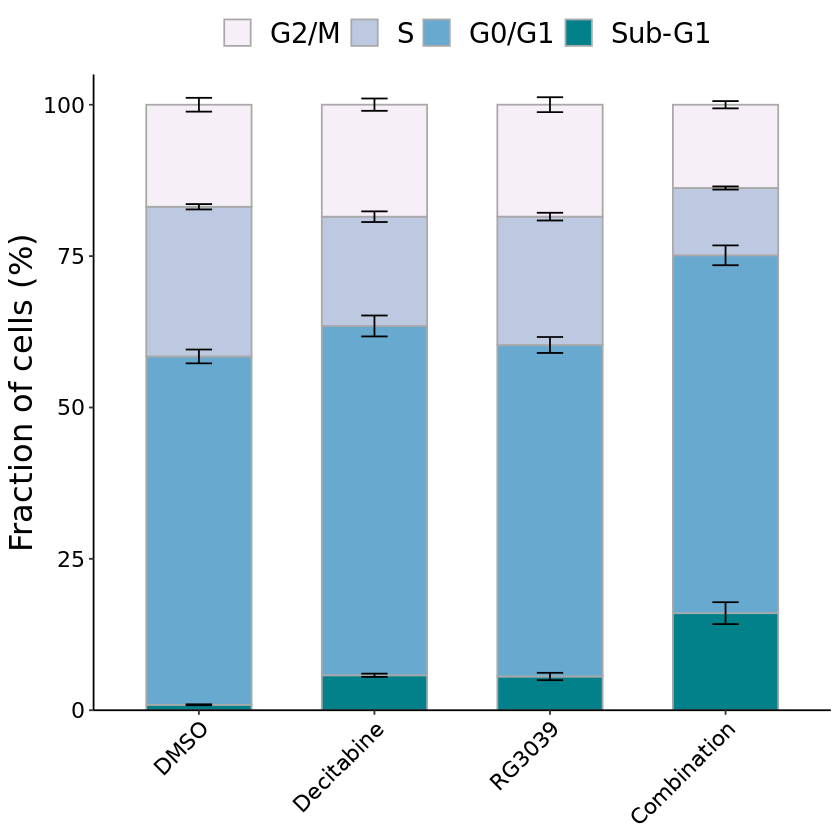

In [35]:
df3 <- df2[c(1:4, 9:12, 17:20, 25:28), ]

p <- ggplot(df3, aes(x = sample, y = mean)) +
geom_bar(aes(fill = phase), 
         stat = 'identity', width = 0.6, color = 'darkgrey') +
theme_classic() +
theme(axis.text.x = element_text(size = rel(1.5), color = 'black', angle = 45, hjust = 1),
      axis.text.y = element_text(size = rel(1.5), color = 'black'),
      axis.title.x = element_blank(),
      axis.title.y = element_text(size = rel(1.75)),
      legend.title = element_blank(),
      legend.text = element_text(size = rel(1.5), color = 'black'),
      legend.position = 'top'
      ) +
labs(x = '', y = 'Fraction of cells (%)') +
scale_x_discrete(name = 'Condition', labels = c('DMSO', 'Decitabine', 'RG3039', 'Combination')) +
scale_y_continuous(expand = c(0,0), limits = c(0,105)) +
geom_errorbar(aes(ymin = cumulative_mean - sd, ymax = cumulative_mean + sd, group = phase, width = 0.15), color = 'black') +
#scale_color_manual(values = brewer.pal(4, 'Blues'), labels = c(' G2/M', ' S', ' G0/G1', ' Sub-G1')) +
scale_fill_manual(values = brewer.pal(4, 'PuBuGn'), labels = c(' G2/M', ' S', ' G0/G1', ' Sub-G1'))

p

ggsave('cell_cycle/cell_cycle_bar_v3.pdf', width = 5, height = 5)

In [16]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] RColorBrewer_1.1-2 ggplot2_3.3.5     

loaded via a namespace (and not attached):
 [1] pillar_1.6.4     compiler_4.1.1   base64enc_0.1-3  tools_4.1.1     
 [5] digest_0.6.28    uuid_1.0-3       jsonlite_1.7.2   evaluate_0.14   
 [9] lifecycle_1.0.1  tibble_3.1.6     gtable_0.3.0     pk

In [18]:
date()

[1] "Tue Dec 14 11:31:46 2021"